In [1]:
import time
import numpy as np
from GEECSPythonAPI import GEECSDevice

In [16]:
##List of of device names
caenSteeringMagnetsNames=['U_S1H','U_S1V','U_S2H','U_S2V',"U_S3H","U_S3V","U_S4H","U_S4V"]
caenSteeringMagnets=dict({})

#loop to make a dict of initialized device objects stored in a dict
for name in caenSteeringMagnetsNames:
    caenSteeringMagnets[name]=GEECSDevice(device_name=name)
    caenSteeringMagnets[name].device_initialize()

#some math to create a list of an exponentially decaying sine wave    
degaussAmp=4.9
x=np.linspace(0,16,129)
y=degaussAmp*np.sin(2*np.pi*x)*np.exp(-x/4)

#loop for executing degauss commands. top level loop goes throught current values to set. 
#The second loop goes through and checks the values. 
allGetVals=np.array([])
for value in y:    
    
    #this loop just sends all the commands (waits until command is accepted, i.e. "no error")
    #It doesn't wait to get a value back. This allows the commands to get sent out "asynchronously"
    for obj in caenSteeringMagnets:
        caenSteeringMagnets[obj].set_only_udp("Current",value)
    
    #this loop starts by reading the 'slow' udp response from the 'set' command above
    #after that, it sends a get command to retrieve the actual value
    for obj in caenSteeringMagnets:
        msg=caenSteeringMagnets[obj].read_slow_udp()
        val=caenSteeringMagnets[obj].get_and_wait_udp('Current')
        allGetVals=np.append(allGetVals,float(val))
        

49831
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>3.358220>>no error,'
b'U_S1H>>getCurrent>>4.603150>>no error,'
b'U_S1H>>getCurrent>>3.154800>>no error,'
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>-2.963360>>no error,'
b'U_S1H>>getCurrent>>-4.062070>>no error,'
b'U_S1H>>getCurrent>>-2.783950>>no error,'
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>2.615470>>no error,'
b'U_S1H>>getCurrent>>3.584810>>no error,'
b'U_S1H>>getCurrent>>2.457010>>no error,'
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>-2.307930>>no error,'
b'U_S1H>>getCurrent>>-3.163370>>no error,'
b'U_S1H>>getCurrent>>-2.168070>>no error,'
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>2.036980>>no error,'
b'U_S1H>>getCurrent>>2.791990>>no error,'
b'U_S1H>>getCurrent>>1.913480>>no error,'
b'U_S1H>>getCurrent>>0.000080>>no error,'
b'U_S1H>>getCurrent>>-1.797290>>no error,'
b'U_S1H>>getCurrent>>-2.463750>>no error,'
b'U_S1H>>getCurrent>

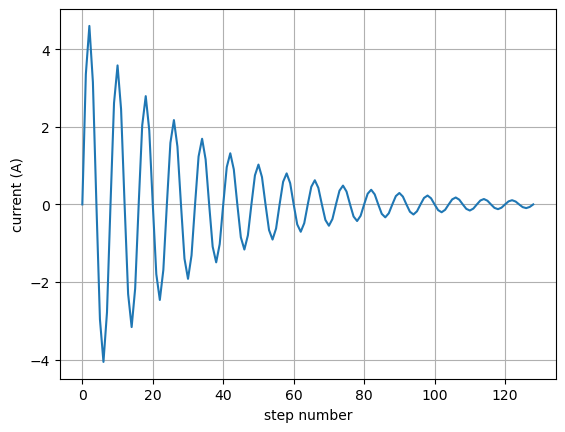

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(allGetVals)

ax.set(xlabel='step number', ylabel='current (A)')
ax.grid()

plt.show()